In [2]:
import requests
from IPython.core.display import HTML

# Model Complexity and Overfitting

**Overview**
In this exercise you will experiment with the impact of model complexity (higher order polynomial) and how it relates to Occam's Razor. 


<article class="message">
    <div class="message-body">
        <strong>List of tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#poly_re">Task 1:  Polynomial regression</a>
            </li>
            <li>
            <a href="#occam_train">Task 2: Train and evaluate linear models with po…</a>
            </li>
            <li>
            <a href="#plot_results">Task 3: Plot the polynomials (models)</a>
            </li>
            <li>
            <a href="#reflection">Task 4: Reflection</a>
            </li>
            <li>
            <a href="#Different_data_func">Task 5: Changing the data generating function</a>
            </li>
        </ul>
    </div>
</article>

<div style="float: right; width: 50%; justify-content: start" class="block is-clearfix">

<div class="has-text-centered">
<figure class="image is-inline-block" >

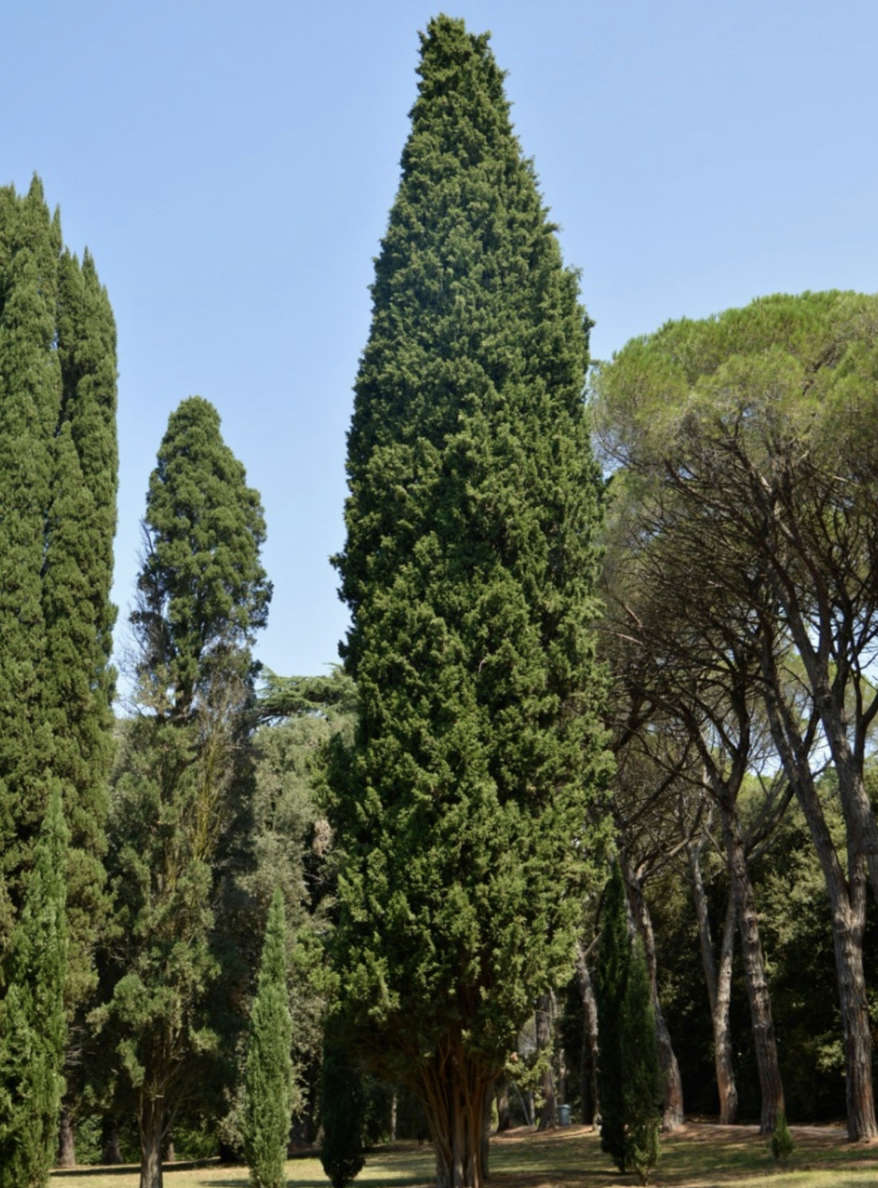


</figure>
</div>


</div>

This exercise is about making a regression model to predict the growth of Thuja Green Giant trees. You have to help the scientists decide which polynomial order best represents the training data to estimate future growth. To determine the optimal fit (model parameters), another group of researchers have provided you with  observation of height of their Thuja Green Giant trees from years later than currently observed by your team (`X_test`
 and `y_test`
). You will use this to choose the optimal model representing the growth of the Thuja Green Giant.
## Data
The following cell constructs and shows the data for the exercise. The data simulates growth (in meters) of one of the fastest growing trees, the Thuja Green Giant, each year. Scientists have observed and reported the growth of the tree for 7 years (`X_train`
 and `y_train`
), and now want to predict the future growth. 
The objective is to assist in making predictions based on this data. Additional data from another group has been provided to validate the hypothesis.
The scientists assume a polynomial relationship. 


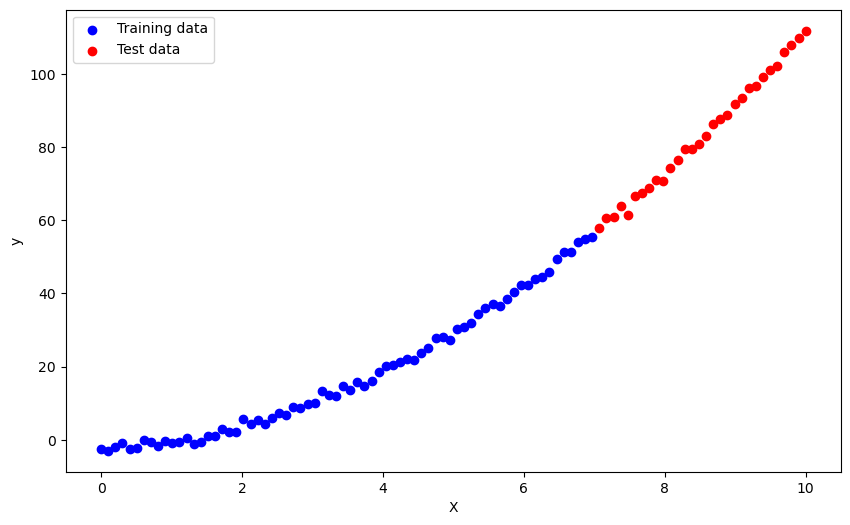

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 100
X = np.linspace(0, 10, n_samples).reshape(-1, 1)
#y_true = 1.5 * X.ravel() + 0.2
#USED FOR LAST ASSIGNMENT:
y_true = X.ravel()**2 + 1.5 * X.ravel() - 3

noise = np.random.normal(0, 1, n_samples)
y = y_true + noise

# Split the data into training and test sets
split_index = int(0.7 * n_samples)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


---
**Task 1 (easy):  Polynomial regression👩‍💻**
1. In this exercise you may reuse polynomial regression using least squares
 from the previous exercise, or use the `PolynomialFeatures()`
 method from the [scikit-learn library](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
 to implement the `polynomial_regression()`
 method in the cell below. 


---

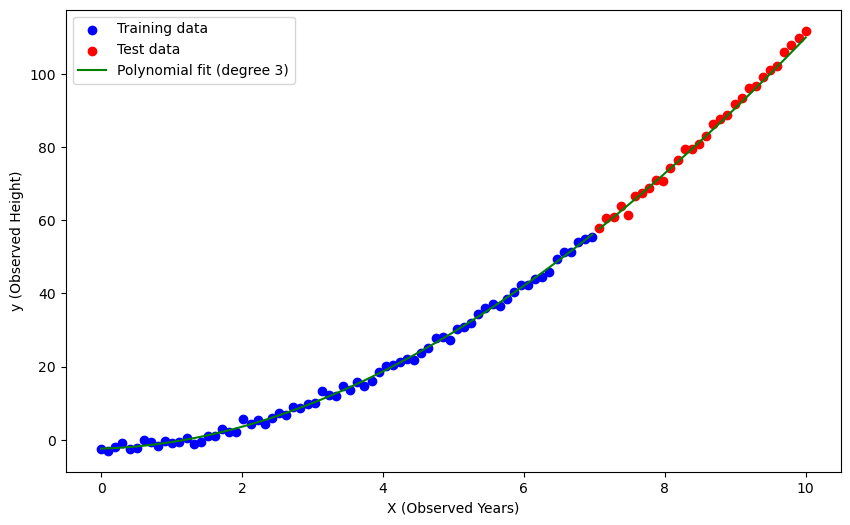

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def polynomial_regression(X, y, degree):
    """
    Create and train a polynomial regression model of desired order and use it to predict the growth of the trees.
    
    :param X: Vector of combined observed years (X values).
    :param y: Vector of combined observed height (y values).
    :param degree: Degree of the polynomial.
    
    :return: Vector containing prediction for training data, vector containing prediction for test data.
    """
    # Step 1: Use the existing split based on the first 70% for training, last 30% for testing
    split_index = int(0.7 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    # Step 2: Create polynomial features of the given degree
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Step 3: Train the model using Linear Regression
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Step 4: Predict on both training and test data
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    return y_train_pred, y_test_pred

# Example usage with the synthetic data you provided:
degree = 3  # You can adjust the polynomial degree

# Call the polynomial_regression function
y_train_pred, y_test_pred = polynomial_regression(X, y, degree)

# Extract the train/test split for plotting
split_index = int(0.7 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Plot the results
plt.figure(figsize=(10, 6))

# Plot the actual data points
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')

# Plot the polynomial fit for both training and test data
plt.plot(X_train, y_train_pred, color='green', label=f'Polynomial fit (degree {degree})')
plt.plot(X_test, y_test_pred, color='green')

plt.xlabel('X (Observed Years)')
plt.ylabel('y (Observed Height)')
plt.legend()
plt.show()



---
**Task 2 (easy): Train and evaluate linear models with polynomial features👩‍💻**
1. Use the function `polynomial_regression`
 to perform polynomial regression for each order defined in the `degrees`
 variable and predict the outcome for both the test and training data. 
2. Implement the function `compute_mse`
 that based on the predictions of a model and the ground truth targets returns the _mean-squared-error_.


$$ MSE = \frac{1}{m}\sum_{i=1}^{m}(f_{\mathbf{w}}(x_{i})-y_{i})^2$$

**Hint**
You may save some time by modifying the implementation of the `rmse`
 function from the previous exercise.

3. For each polynomial model calculate the _mean-squared-error_ for both the training and test data (use `polynomial_regression`
 and `compute_mse`
).


---

In [5]:
def compute_mse(y_true, y_pred):
    """Compute Mean Squared Error between true and predicted values."""
    return np.mean((y_true - y_pred) ** 2)

# Train and evaluate linear models with different polynomial features

degrees = [1, 2, 3, 4, 5, 6]
train_pred = []
test_pred = []
train_error = []
test_error = []

# Use the polynomial_regression function from Task 1
for degree in degrees:
    # Train the polynomial regression model and get predictions
    y_train_pred, y_test_pred = polynomial_regression(X, y, degree)
    
    # Compute MSE for training and test sets
    mse_train = compute_mse(y[:split_index], y_train_pred)
    mse_test = compute_mse(y[split_index:], y_test_pred)
    
    # Store predictions and errors
    train_pred.append(y_train_pred)
    test_pred.append(y_test_pred)
    train_error.append(mse_train)
    test_error.append(mse_test)

# Output the results
for i, degree in enumerate(degrees):
    print(f"Degree: {degree}")
    print(f"Training MSE: {train_error[i]:.4f}")
    print(f"Test MSE: {test_error[i]:.4f}")
    print()

Degree: 1
Training MSE: 16.3340
Test MSE: 567.5918

Degree: 2
Training MSE: 0.7471
Test MSE: 2.9253

Degree: 3
Training MSE: 0.7308
Test MSE: 1.6086

Degree: 4
Training MSE: 0.7265
Test MSE: 7.9807

Degree: 5
Training MSE: 0.7258
Test MSE: 3.2271

Degree: 6
Training MSE: 0.7153
Test MSE: 3021.0111




---
**Task 3 (easy): Plot the polynomials (models)👩‍💻**
Run the cell below to:
1. Plot the data so that training and test data have different colors.
2. Plot the predictions of the polynomial models over the scatter plot showing the given data. Perform this for both the training and test sets using X as input.


---

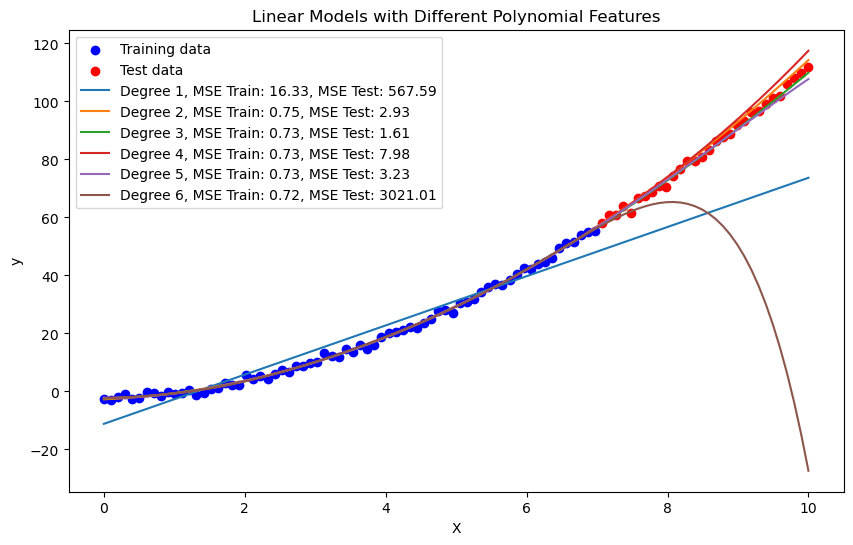

In [7]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plot the actual data points for training and test sets
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')

# Loop through each polynomial degree
for i, degree in enumerate(degrees):
    # Plot the predicted polynomial curve for training data
    plt.plot(np.concatenate([X_train, X_test]), 
             np.concatenate([train_pred[i], test_pred[i]]), 
             label=f'Degree {degree}, MSE Train: {train_error[i]:.2f}, MSE Test: {test_error[i]:.2f}')

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Models with Different Polynomial Features')
plt.show()



---
**Task 4 (medium): Reflection💡**
Reflect on:
1. Which model had the best performance  on the training data?
2. Which model had the best performance  on the test data?
3. How does the complexity (degree) of the model affect the performance on the training and test data?
4. Which model(s) shows signs of overfitting? How can you tell?


---

# 4 

**1 - Best model on training**
Degree 6, shows the lowest error on training data alone.

**2 - Best model on testing**
Degree 2, shows the lowest error on test data alone

**3 - affection of model complexity**

Increasing model complexity will often reduce the training error, but at the cost of prediction error.
Therefore we want a sweetspot of low bias and low variance, such as degree of 2


**4 - Signs of overfitting**

A sign of overfitting, is a very low training error, but very high prediction error.
Such as degree of 6, where it attempts to hit every training point, but then is bad at unseen data.



---
**Task 5 (medium): Changing the data generating function👩‍💻💡**
How do the results change if the underlying function generating the data was changed to a 2. order polynomial, so that it e.g. simulates bacteria growth instead? 
1. Re-generate the data by replacing `y_true`
 with $y=f(x)=x^2+1.5x-3$ in the data generation step, and rerun the other code blocks.
2. Does it still make sense to follow the strategy of Occam's razor?


---

## Task 5

We now observe that Occam's razor (most simple model), being a linear line, doesn't capture the ground truth very well. It has high error on both training and testing data (worse than before).
Instead we get pretty accurate predictions on degree 2 and 3 with low error on both training and testing data.